***Public safety***

In [32]:
import pandas as pd
import numpy as np
import sklearn as skl
import matplotlib.pyplot as plt
import tqdm as tqdm
import seaborn as sns

In [33]:
public_safety_df = pd.read_csv(r"C:\Users\User\Desktop\Block D GitHub\Week 4\Crimes per district.csv", delimiter=';')

In [34]:
def data_quality_report(data):

    # Basic information about the data
    report = {}
    report['Number of Rows'] = len(data)
    report['Number of Columns'] = len(data.columns)
    
    # Column-wise data quality metrics
    report['Column Data Types'] = data.dtypes
    report['Number of Missing Values'] = data.isnull().sum()
    report['Percentage of Missing Values'] = (data.isnull().sum() / len(data)) * 100
    
    # Overall data quality metrics
    report['Total Missing Values'] = report['Number of Missing Values'].sum()
    report['Total Percentage of Missing Values'] = (report['Total Missing Values'] / (len(data) * len(data.columns))) * 100
    
    return pd.DataFrame(report)
# Usage
ps_data = pd.read_csv(r"C:\Users\User\Desktop\Block D GitHub\Week 4\Crimes per district.csv", delimiter=';') 
ps_report = data_quality_report(ps_data)
print(ps_report)

                                    Number of Rows  Number of Columns  \
Soort misdrijf                                 748                  4   
Perioden                                       748                  4   
Wijken en buurten                              748                  4   
Geregistreerde misdrijven (aantal)             748                  4   

                                   Column Data Types  \
Soort misdrijf                                object   
Perioden                                       int64   
Wijken en buurten                             object   
Geregistreerde misdrijven (aantal)             int64   

                                    Number of Missing Values  \
Soort misdrijf                                             0   
Perioden                                                   0   
Wijken en buurten                                          0   
Geregistreerde misdrijven (aantal)                         0   

                                

In [35]:
public_safety_df

,Soort misdrijf,Perioden,Wijken en buurten,Geregistreerde misdrijven (aantal)
0,Totaal misdrijven,2012,Breda,16589
1,Totaal misdrijven,2013,Breda,15155
2,Totaal misdrijven,2014,Breda,13951
3,Totaal misdrijven,2015,Breda,13191
4,Totaal misdrijven,2016,Breda,12441
...,...,...,...,...
743,Totaal misdrijven,2018,Buitengebied Teteringen,13
744,Totaal misdrijven,2019,Buitengebied Teteringen,6
745,Totaal misdrijven,2020,Buitengebied Teteringen,8
746,Totaal misdrijven,2021,Buitengebied Teteringen,9


In [36]:
# Define a translation dictionary
translation = {'Soort misdrijf': 'Type of crime',
               'Perioden': 'Year',
               'Wijken en buurten': 'Districts and neighbourhoods',
               'Geregistreerde misdrijven (aantal)': 'Registered crimes (number)'}

# Translate the columns
public_safety_df = public_safety_df.rename(columns=translation)

# Print the translated DataFrame
print(public_safety_df)

         Type of crime  Year Districts and neighbourhoods  \
0    Totaal misdrijven  2012                        Breda   
1    Totaal misdrijven  2013                        Breda   
2    Totaal misdrijven  2014                        Breda   
3    Totaal misdrijven  2015                        Breda   
4    Totaal misdrijven  2016                        Breda   
..                 ...   ...                          ...   
743  Totaal misdrijven  2018      Buitengebied Teteringen   
744  Totaal misdrijven  2019      Buitengebied Teteringen   
745  Totaal misdrijven  2020      Buitengebied Teteringen   
746  Totaal misdrijven  2021      Buitengebied Teteringen   
747  Totaal misdrijven  2022      Buitengebied Teteringen   

     Registered crimes (number)  
0                         16589  
1                         15155  
2                         13951  
3                         13191  
4                         12441  
..                          ...  
743                          

In [37]:
# Deleting the column, that I needn't
public_safety_df = public_safety_df.drop('Type of crime', 1)

C:\Users\User\AppData\Local\Temp\ipykernel_5972\3666392845.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  public_safety_df = public_safety_df.drop('Type of crime', 1)


In [38]:
public_safety_df

,Year,Districts and neighbourhoods,Registered crimes (number)
0,2012,Breda,16589
1,2013,Breda,15155
2,2014,Breda,13951
3,2015,Breda,13191
4,2016,Breda,12441
...,...,...,...
743,2018,Buitengebied Teteringen,13
744,2019,Buitengebied Teteringen,6
745,2020,Buitengebied Teteringen,8
746,2021,Buitengebied Teteringen,9


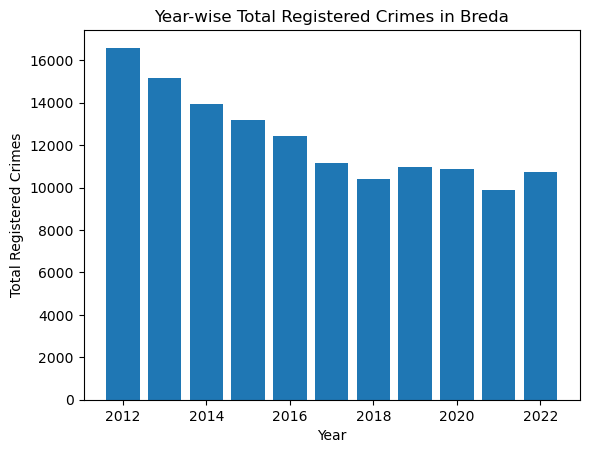

In [39]:
# Filter the DataFrame for 'Breda' district
breda_crime_df = public_safety_df[public_safety_df['Districts and neighbourhoods'] == 'Breda']

# Grouping the filtered DataFrame by 'Year' and summing the 'Registered crimes (number)'
yearly_crime_totals = breda_crime_df.groupby('Year')['Registered crimes (number)'].sum()

# Creating a bar chart
plt.bar(yearly_crime_totals.index, yearly_crime_totals.values)
plt.xlabel('Year')
plt.ylabel('Total Registered Crimes')
plt.title('Year-wise Total Registered Crimes in Breda')
plt.show()

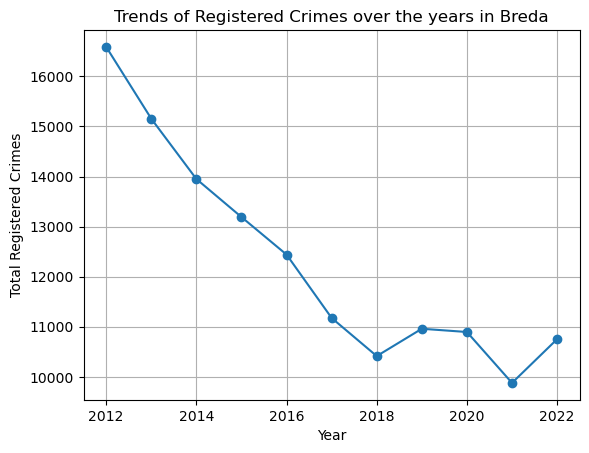

In [40]:
# Creating a line plot
plt.plot(yearly_crime_totals.index, yearly_crime_totals.values, marker='o')
plt.xlabel('Year')
plt.ylabel('Total Registered Crimes')
plt.title('Trends of Registered Crimes over the years in Breda')
plt.grid(True)
plt.show()

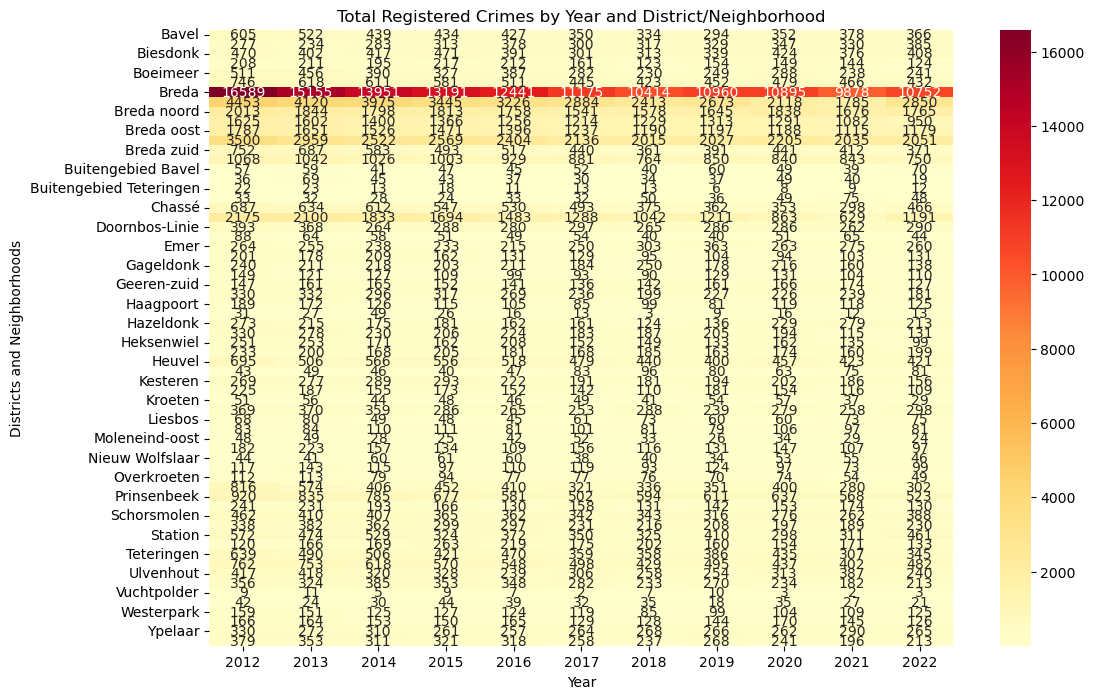

In [41]:
# Pivot the DataFrame to create a matrix of total registered crimes
crime_matrix = public_safety_df.pivot_table(index='Districts and neighbourhoods',
                                            columns='Year',
                                            values='Registered crimes (number)',
                                            aggfunc='sum')

# Creating a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(crime_matrix, cmap='YlOrRd', annot=True, fmt='g')
plt.xlabel('Year')
plt.ylabel('Districts and Neighborhoods')
plt.title('Total Registered Crimes by Year and District/Neighborhood')
plt.show()

In [42]:
nuisances_df = pd.read_csv(r"C:\Users\User\Desktop\Block D GitHub\Week 4\Nuisances.csv", delimiter=';')

In [43]:
def data_quality_report(data):

    # Basic information about the data
    report = {}
    report['Number of Rows'] = len(data)
    report['Number of Columns'] = len(data.columns)
    
    # Column-wise data quality metrics
    report['Column Data Types'] = data.dtypes
    report['Number of Missing Values'] = data.isnull().sum()
    report['Percentage of Missing Values'] = (data.isnull().sum() / len(data)) * 100
    
    # Overall data quality metrics
    report['Total Missing Values'] = report['Number of Missing Values'].sum()
    report['Total Percentage of Missing Values'] = (report['Total Missing Values'] / (len(data) * len(data.columns))) * 100
    
    return pd.DataFrame(report)
# Usage
nui_data = pd.read_csv(r"C:\Users\User\Desktop\Block D GitHub\Week 4\Nuisances.csv", delimiter=';') 
nui_report = data_quality_report(nui_data)
print(nui_report)

                                  Number of Rows  Number of Columns  \
Overlast                                     612                  4   
Perioden                                     612                  4   
Wijken en buurten                            612                  4   
Geregistreerde overlast (aantal)             612                  4   

                                 Column Data Types  Number of Missing Values  \
Overlast                                    object                         0   
Perioden                                     int64                         0   
Wijken en buurten                           object                         0   
Geregistreerde overlast (aantal)             int64                         0   

                                  Percentage of Missing Values  \
Overlast                                                   0.0   
Perioden                                                   0.0   
Wijken en buurten                            

In [44]:
nuisances_df

,Overlast,Perioden,Wijken en buurten,Geregistreerde overlast (aantal)
0,Totaal registraties overlast,2022,Breda,5672
1,Totaal registraties overlast,2022,Breda centrum,1170
2,Totaal registraties overlast,2022,Valkenberg,121
3,Totaal registraties overlast,2022,Chassé,186
4,Totaal registraties overlast,2022,Fellenoord,108
...,...,...,...,...
607,Geluidshinder overig,2022,Buitengebied Prinsenbeek,5
608,Geluidshinder overig,2022,Teteringen,22
609,Geluidshinder overig,2022,Teteringen,19
610,Geluidshinder overig,2022,Vuchtpolder,1


In [45]:
# Deleting the column, that I needn't
nuisances_df = nuisances_df.drop('Perioden', 1)

# Deleting the column, that I needn't
nuisances_df = nuisances_df.drop('Overlast', 1)

C:\Users\User\AppData\Local\Temp\ipykernel_5972\710020306.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  nuisances_df = nuisances_df.drop('Perioden', 1)
C:\Users\User\AppData\Local\Temp\ipykernel_5972\710020306.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  nuisances_df = nuisances_df.drop('Overlast', 1)


In [46]:
# Define a translation dictionary
translate = {'Wijken en buurten': 'Districts and neighbourhoods',
               'Geregistreerde overlast (aantal)': 'Registered nuisance (number)'}

# Translate the columns
nuisances_df = nuisances_df.rename(columns=translate)

# Print the translated DataFrame
print(nuisances_df)

    Districts and neighbourhoods  Registered nuisance (number)
0                          Breda                          5672
1                  Breda centrum                          1170
2                     Valkenberg                           121
3                         Chassé                           186
4                     Fellenoord                           108
..                           ...                           ...
607     Buitengebied Prinsenbeek                             5
608                   Teteringen                            22
609                   Teteringen                            19
610                  Vuchtpolder                             1
611      Buitengebied Teteringen                             2

[612 rows x 2 columns]


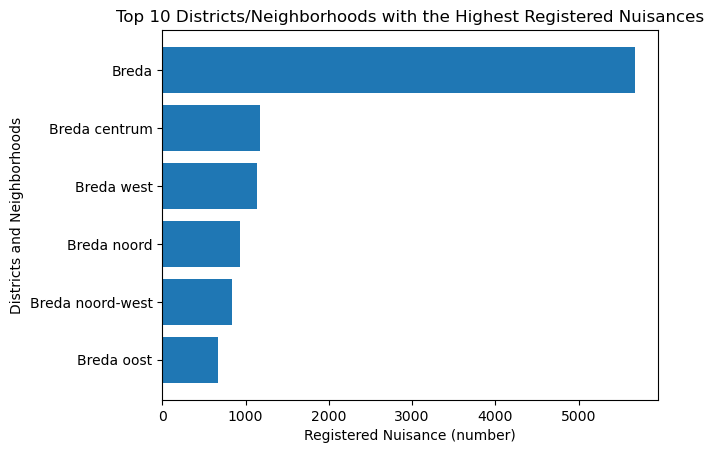

In [47]:
# Sorting the DataFrame by 'Registered nuisance (number)' in descending order
sorted_df = nuisances_df.sort_values('Registered nuisance (number)', ascending=False)

# Creating a bar chart of the top 10 districts/neighborhoods
top_10 = sorted_df.head(10)
plt.barh(top_10['Districts and neighbourhoods'], top_10['Registered nuisance (number)'])
plt.xlabel('Registered Nuisance (number)')
plt.ylabel('Districts and Neighborhoods')
plt.title('Top 10 Districts/Neighborhoods with the Highest Registered Nuisances')
plt.gca().invert_yaxis()
plt.show()

In [48]:
import geopandas as gpd

# Download the shapefile for Breda
gdf_breda = gpd.read_file(r"C:\Users\User\Desktop\Block D GitHub\Week 4\Wijken.geojson")

In [49]:
print(gdf_breda.columns)
print(gdf_breda.head())

Index(['OBJECTID', 'WIJKCODE', 'WIJK', 'OPPERVLAKTE', 'WOONPLAATS',
       'WOONPLAATSCODE', 'GEMEENTE', 'GEMEENTECODE', 'Shape__Area',
       'Shape__Length', 'geometry'],
      dtype='object')
   OBJECTID WIJKCODE           WIJK   OPPERVLAKTE  WOONPLAATS WOONPLAATSCODE  \
0        27       00  Breda centrum  2.104368e+06       Breda           3622   
1        28       07          Bavel  1.133641e+07       Bavel           3624   
2        29       10     Teteringen  1.143921e+07  Teteringen           3623   
3        30       04     Breda zuid  2.973748e+06       Breda           3622   
4        31       05     Breda west  2.654542e+07       Breda           3622   

  GEMEENTE GEMEENTECODE   Shape__Area  Shape__Length  \
0    Breda         0758  2.104368e+06    6110.055539   
1    Breda         0758  1.133641e+07   16588.058178   
2    Breda         0758  1.143921e+07   15577.316839   
3    Breda         0758  2.973748e+06    9885.622039   
4    Breda         0758  2.654542e+07   4434

In [50]:
# Deleting the column, that I needn't
gdf_breda = gdf_breda.drop('WIJKCODE', 1)

# Deleting the column, that I needn't
gdf_breda = gdf_breda.drop('WOONPLAATS', 1)

# Deleting the column, that I needn't
gdf_breda = gdf_breda.drop('WOONPLAATSCODE', 1)

# Deleting the column, that I needn't
gdf_breda = gdf_breda.drop('GEMEENTE', 1)

# Deleting the column, that I needn't
gdf_breda = gdf_breda.drop('GEMEENTECODE', 1)

# Deleting the column, that I needn't
gdf_breda = gdf_breda.drop('OBJECTID', 1)

C:\Users\User\AppData\Local\Temp\ipykernel_5972\1640374096.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  gdf_breda = gdf_breda.drop('WIJKCODE', 1)
C:\Users\User\AppData\Local\Temp\ipykernel_5972\1640374096.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  gdf_breda = gdf_breda.drop('WOONPLAATS', 1)
C:\Users\User\AppData\Local\Temp\ipykernel_5972\1640374096.py:8: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  gdf_breda = gdf_breda.drop('WOONPLAATSCODE', 1)
C:\Users\User\AppData\Local\Temp\ipykernel_5972\1640374096.py:11: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  gdf_breda = gdf_breda.drop('GEMEENTE', 1)
C:\Users\User\AppData\Local

In [51]:
gdf_breda

,WIJK,OPPERVLAKTE,Shape__Area,Shape__Length,geometry
0,Breda centrum,2.104368e+06,2.104368e+06,6110.055539,"POLYGON ((4.77152 51.59284, 4.77112 51.59364, ..."
1,Bavel,1.133641e+07,1.133641e+07,16588.058178,"POLYGON ((4.81335 51.55728, 4.81044 51.55882, ..."
2,Teteringen,1.143921e+07,1.143921e+07,15577.316839,"POLYGON ((4.80703 51.61150, 4.80323 51.61222, ..."
3,Breda zuid,2.973748e+06,2.973748e+06,9885.622039,"POLYGON ((4.75712 51.57078, 4.75689 51.57140, ..."
4,Breda west,2.654542e+07,2.654542e+07,44343.365191,"POLYGON ((4.74169 51.59271, 4.74199 51.59273, ..."
5,Breda oost,8.368494e+06,8.368494e+06,14521.027025,"POLYGON ((4.78656 51.58720, 4.78683 51.58750, ..."
6,Breda zuid-oost,1.798582e+07,1.798582e+07,23847.045608,"POLYGON ((4.78363 51.57363, 4.78535 51.57413, ..."
7,Breda noord-west,1.676347e+07,1.676347e+07,18091.780829,"POLYGON ((4.71777 51.61061, 4.71770 51.61071, ..."
8,Prinsenbeek,1.711110e+07,1.711110e+07,20470.689384,"POLYGON ((4.71795 51.61035, 4.71804 51.61022, ..."
9,Ulvenhout,5.220490e+06,5.220490e+06,11831.944953,"POLYGON ((4.79211 51.55332, 4.79282 51.55396, ..."


In [52]:
# Define a translation dictionary
transl = {'WIJK': 'District',
            'OPPERVLAKTE' : 'Surface'}

# Translate the columns
gdf_breda = gdf_breda.rename(columns=transl)

# Print the translated DataFrame
print(gdf_breda)

            District       Surface   Shape__Area  Shape__Length  \
0      Breda centrum  2.104368e+06  2.104368e+06    6110.055539   
1              Bavel  1.133641e+07  1.133641e+07   16588.058178   
2         Teteringen  1.143921e+07  1.143921e+07   15577.316839   
3         Breda zuid  2.973748e+06  2.973748e+06    9885.622039   
4         Breda west  2.654542e+07  2.654542e+07   44343.365191   
5         Breda oost  8.368494e+06  8.368494e+06   14521.027025   
6    Breda zuid-oost  1.798582e+07  1.798582e+07   23847.045608   
7   Breda noord-west  1.676347e+07  1.676347e+07   18091.780829   
8        Prinsenbeek  1.711110e+07  1.711110e+07   20470.689384   
9          Ulvenhout  5.220490e+06  5.220490e+06   11831.944953   
10       Breda noord  8.831918e+06  8.831918e+06   16373.207797   

                                             geometry  
0   POLYGON ((4.77152 51.59284, 4.77112 51.59364, ...  
1   POLYGON ((4.81335 51.55728, 4.81044 51.55882, ...  
2   POLYGON ((4.80703 51.61

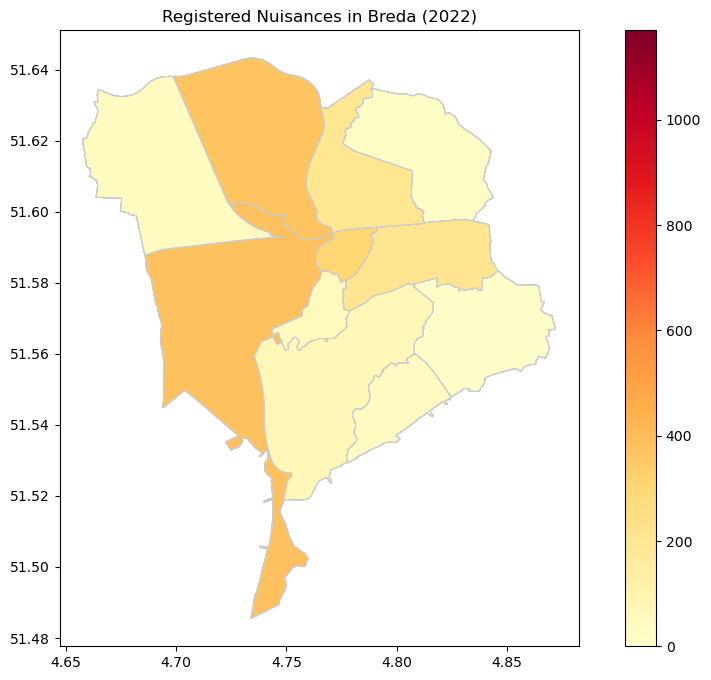

In [53]:
# Merge the nuisances DataFrame with the Breda neighborhoods shapefile
merged_data = gdf_breda.merge(nuisances_df, left_on='District', right_on='Districts and neighbourhoods', how='left')

# Plot the choropleth map
fig, ax = plt.subplots(figsize=(12, 8))
merged_data.plot(column='Registered nuisance (number)', cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
ax.set_title('Registered Nuisances in Breda (2022)')
plt.show()